# 1. TASK 5 - CREDIT CARD FRAUD DETECTION



* Build a machine learning model to identify fraudulent credit card Transactions. Pre-process and normalize
the transaction data, handle class imbalance issues, and split the dataset into training and testing sets.
* Train
a classification algorithm, such as logistic regression or random forests, to classify transactions as fraudulent
or genuine.
Evaluate the model' s performance using metrics like precision, recall, and F1-score, and consider techniques
like oversampling or under sampling for improving results.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Importing Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import seaborn as sns
from collections import Counter
np.random.seed(0)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from imblearn.over_sampling import SMOTE

# 3. Data Processing

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AspireNex/dataset/creditcard.csv')

In [ ]:
data.head(10)  #Showing first 10 different transctions and their results with features.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
data.describe()  # Describing Mean,Min,Max,Bount,std,and some other properties of Features.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.isnull().sum()  # Calculating no, of Null values per feature.

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.Class.value_counts()   #Showing no. of genuine and fraud transctions.

Class
0    284315
1       492
Name: count, dtype: int64

# Histogram for Feature Time

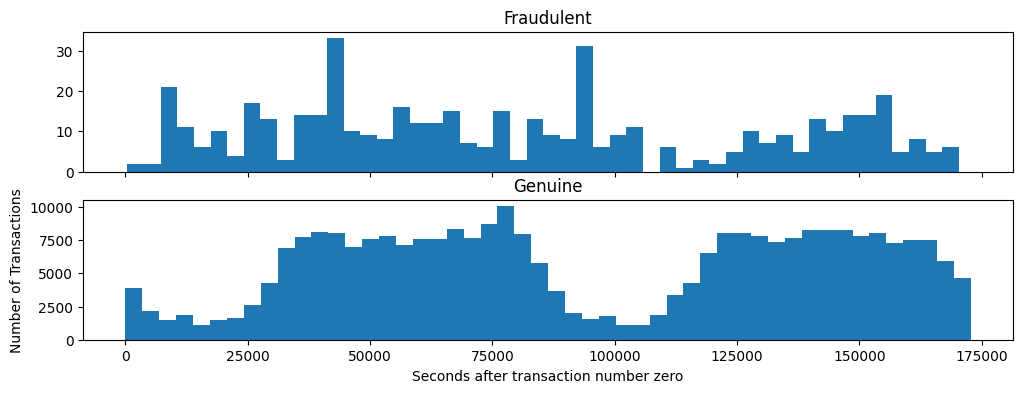

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(data["Time"][data["Class"] == 1], bins = 50)
ax1.set_title('Fraudulent')

ax2.hist(data["Time"][data["Class"] == 0], bins = 50)
ax2.set_title('Genuine')


plt.xlabel('Seconds after transaction number zero')
plt.ylabel('Number of Transactions')
plt.show()

The transctions occur in a cyclic way. But the time feature does not provide any useful information as the time when the first transction was initiated is not given. Thus, we will drop this feature.

**3.1 Scale the Amount variable**

In [ ]:
#Variance
data.var()

Time      2.255124e+09
V1        3.836489e+00
V2        2.726820e+00
V3        2.299029e+00
V4        2.004684e+00
V5        1.905081e+00
V6        1.774946e+00
V7        1.530401e+00
V8        1.426479e+00
V9        1.206992e+00
V10       1.185594e+00
V11       1.041855e+00
V12       9.984034e-01
V13       9.905708e-01
V14       9.189055e-01
V15       8.378034e-01
V16       7.678191e-01
V17       7.213734e-01
V18       7.025394e-01
V19       6.626619e-01
V20       5.943254e-01
V21       5.395255e-01
V22       5.266428e-01
V23       3.899507e-01
V24       3.668084e-01
V25       2.717308e-01
V26       2.325429e-01
V27       1.629192e-01
V28       1.089550e-01
Amount    6.256007e+04
Class     1.724507e-03
dtype: float64

Amount needs to be scaled. As if a feature has a variance orders of magnitude larger than the rest of the features, then it might dominate and , make the estimator unable to learn from other features as expected

In [ ]:
scaling_model = StandardScaler()
data['Normalized_Amount'] = scaling_model.fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Amount'],axis=1)

**3.2 Split data into training set and test set**

In [ ]:
X = data.drop(['Class','Time'], axis = 1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

**3.3 Convert data**

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Different Models Building and Training

Before building the model, we can use standard scaler function to scale the values into a common range.

# Logistic Regression

In [ ]:
scaler = StandardScaler()
lr = LogisticRegression() #Passing defalut parameters
model1 = Pipeline([('standardize',scaler),('log_reg',lr)])

In [ ]:
history_model1 = model1.fit(X_train,y_train)
history_model1

Pipeline(steps=[('standardize', StandardScaler()),
                ('log_reg', LogisticRegression())])

**Traininy Accuracy**

In [ ]:
y_train_model1 = history_model1.predict(X_train)

train_accuracy1 = accuracy_score(y_train, y_train_model1)*100
train_auc_roc11 = roc_auc_score(y_train, y_train_model1.round())*100

print('Confusion matrix:\n', confusion_matrix(y_train, y_train_model1))

print('Training AUC: %.4f %%' % train_auc_roc11)

print('Training accuracy: %.4f %%' % train_accuracy1)

Confusion matrix:
 [[198990     29]
 [   130    215]]
Training AUC: 81.1521 %
Training accuracy: 99.9202 %


**Tessting Score**

In [ ]:
def plot_confusion_matrix(cm):
    class_feat=data['Class'].copy()
    class_feat= class_feat.unique()
    fig, ax = plt.subplots(figsize=(5,5))
    sn.heatmap(cm, annot=True, fmt='d', xticklabels=class_feat, yticklabels=class_feat)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()


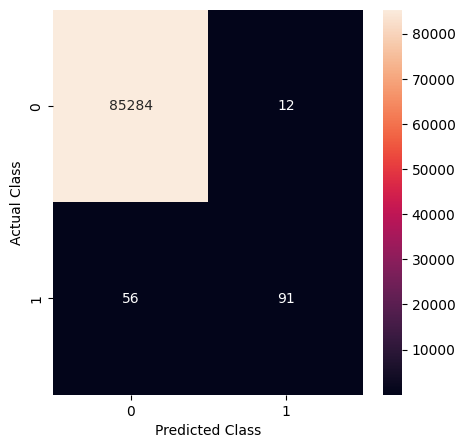

[[85284    12]
 [   56    91]]


In [ ]:
y_test_model1 = history_model1.predict(X_test)
cm1 = confusion_matrix(y_test,y_test_model1.round())
plot_confusion_matrix(cm1)
print(cm1)

In [ ]:
def print_scores(org,pred):
    accuracy = accuracy_score(org,pred)
    precision = precision_score(org,pred)
    recall = recall_score(org,pred)
    f1 = f1_score(org,pred)
    print("Accuracy : ",accuracy)
    print("Precision : ",precision)
    print("Recall : ",recall)
    print("F1 Score : ",f1)

In [ ]:
print_scores(y_test,y_test_model1.round())
a1 = accuracy_score(y_test,y_test_model1.round())

Accuracy :  0.999204147794436
Precision :  0.883495145631068
Recall :  0.6190476190476191
F1 Score :  0.728





*   **SVC**
*   https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.**html**


In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
model2 =  make_pipeline(scaler, SVC(gamma='auto'))

In [ ]:
history_model2 = model2.fit(X_train,y_train)
history_model2

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

**Training Accyracy**

In [ ]:
y_train_model2 = history_model2.predict(X_train)

train_accuracy2 = accuracy_score(y_train, y_train_model2)*100
train_auc_roc2 = roc_auc_score(y_train, y_train_model2.round())*100

print('Confusion matrix:\n', confusion_matrix(y_train, y_train_model2))

print('Training AUC: %.4f %%' % train_auc_roc2)

print('Training accuracy: %.4f %%' % train_accuracy2)

Confusion matrix:
 [[199013      6]
 [    61    284]]
Training AUC: 91.1579 %
Training accuracy: 99.9664 %


**Testing Accuracy**

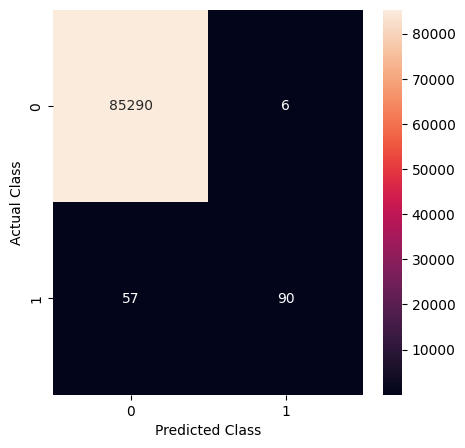

[[85290     6]
 [   57    90]]


In [ ]:
y_test_model2 = history_model2.predict(X_test)
cm2 = confusion_matrix(y_test,y_test_model2.round())
plot_confusion_matrix(cm2)
print(cm2)

In [ ]:
# Test scores
print_scores(y_test,y_test_model2.round())
a2 = accuracy_score(y_test,y_test_model2.round())

Accuracy :  0.9992626663389628
Precision :  0.9375
Recall :  0.6122448979591837
F1 Score :  0.7407407407407408


* **Decision Tree**


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Creating the classifier object
model3 = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)

In [ ]:
history_model3 = model3.fit(X_train,y_train)
history_model3

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

**Training Accuracy**

In [ ]:
y_train_model3 = history_model3.predict(X_train)

train_accuracy3 = accuracy_score(y_train, y_train_model3)*100
train_auc_roc3 = roc_auc_score(y_train, y_train_model3.round())*100

print('Confusion matrix:\n', confusion_matrix(y_train, y_train_model3))

print('Training AUC: %.4f %%' % train_auc_roc3)

print('Training accuracy: %.4f %%' % train_accuracy3)

Confusion matrix:
 [[198968     51]
 [    84    261]]
Training AUC: 87.8133 %
Training accuracy: 99.9323 %


**Testing Score**

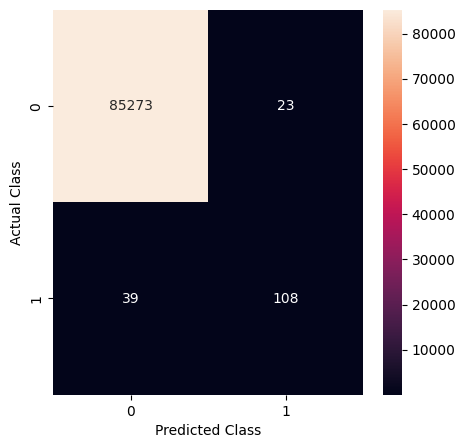

[[85273    23]
 [   39   108]]


In [ ]:
y_test_model3 = history_model3.predict(X_test)
cm3 = confusion_matrix(y_test,y_test_model3.round())
plot_confusion_matrix(cm3)
print(cm3)

In [ ]:
print_scores(y_test,y_test_model3.round())
a3 = accuracy_score(y_test,y_test_model3.round())

Accuracy :  0.9992743700478681
Precision :  0.8244274809160306
Recall :  0.7346938775510204
F1 Score :  0.7769784172661872


* **Neural Networks**
https://realpython.com/python-ai-neural-network/*italicized text*




In [ ]:
from sklearn.neural_network import MLPClassifier
model4 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
history_model4 = model4.fit(X_train,y_train)

In [ ]:
history_model4 = model4.fit(X_train,y_train)

**Traininy Accuracy**

In [ ]:
y_train_model4 = history_model4.predict(X_train)

train_accuracy4 = accuracy_score(y_train, y_train_model4)*100
train_auc_roc4 = roc_auc_score(y_train, y_train_model4.round())*100

print('Confusion matrix:\n', confusion_matrix(y_train, y_train_model4))

print('Training AUC: %.4f %%' % train_auc_roc4)

print('Training accuracy: %.4f %%' % train_accuracy4)

Confusion matrix:
 [[199006     13]
 [    74    271]]
Training AUC: 89.2721 %
Training accuracy: 99.9564 %


**Testing Accuracy**

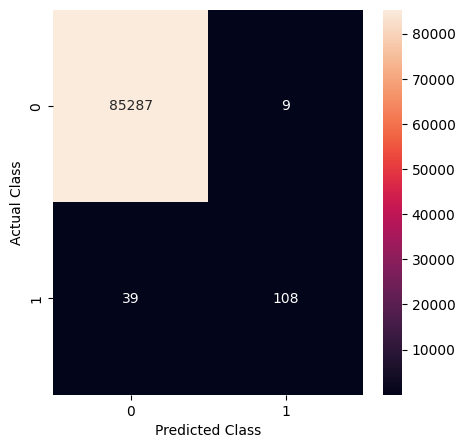

[[85287     9]
 [   39   108]]


In [ ]:
y_test_model4 = history_model4.predict(X_test)
cm4 = confusion_matrix(y_test,y_test_model4.round())
plot_confusion_matrix(cm4)
print(cm4)

In [ ]:
print_scores(y_test,y_test_model4.round())
a4 = accuracy_score(y_test,y_test_model4.round())

Accuracy :  0.9994382219725431
Precision :  0.9230769230769231
Recall :  0.7346938775510204
F1 Score :  0.8181818181818182


* KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=1)
model_knn = model_knn.fit(X_train,y_train)
model_knn

KNeighborsClassifier(n_neighbors=1)

* Training Accuracy

In [ ]:
y_train_model_knn = model_knn.predict(X_train)

train_accuracy_knn = accuracy_score(y_train, y_train_model_knn)*100
train_auc_roc3 = roc_auc_score(y_train, y_train_model3.round())*100

print('Confusion matrix:\n', confusion_matrix(y_train, y_train_model3))

print('Training AUC: %.4f %%' % train_auc_roc3)

print('Training accuracy: %.4f %%' % train_accuracy3)

Confusion matrix:
 [[198968     51]
 [    84    261]]
Training AUC: 87.8133 %
Training accuracy: 99.9323 %


* Testing Accuracy

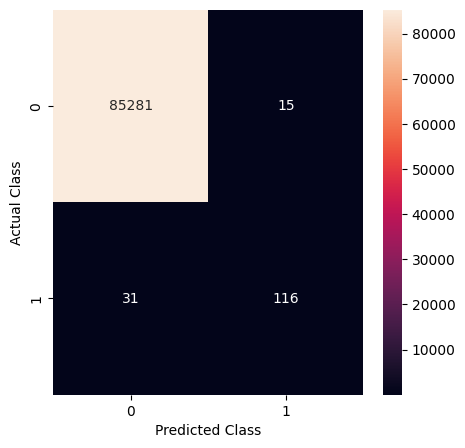

[[85281    15]
 [   31   116]]


In [ ]:
y_test_model_knn = model_knn.predict(X_test)
cm4 = confusion_matrix(y_test,y_test_model_knn.round())
plot_confusion_matrix(cm4)
print(cm4)

In [ ]:
print_scores(y_test,y_test_model_knn.round())

Accuracy :  0.9994616293903538
Precision :  0.8854961832061069
Recall :  0.7891156462585034
F1 Score :  0.8345323741007193




# 4. Deep neural network




4.1 create Model

In [ ]:
model = Sequential()
model.add(Dense(input_dim = 29, units = 24, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                720       
                                                                 
 dense_1 (Dense)             (None, 16)                400       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1265 (4.94 KB)
Trainable params: 1265 (4.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


4.2 Fit Model

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size = 16, epochs = 10)

Epoch 1/10
12461/12461 [==============================] - 29s 2ms/step - loss: 0.0059 - accuracy: 0.9991
Epoch 2/10
12461/12461 [==============================] - 27s 2ms/step - loss: 0.0032 - accuracy: 0.9994
Epoch 3/10
12461/12461 [==============================] - 26s 2ms/step - loss: 0.0030 - accuracy: 0.9994
Epoch 4/10
12461/12461 [==============================] - 26s 2ms/step - loss: 0.0029 - accuracy: 0.9994
Epoch 5/10
12461/12461 [==============================] - 26s 2ms/step - loss: 0.0028 - accuracy: 0.9994
Epoch 6/10
12461/12461 [==============================] - 25s 2ms/step - loss: 0.0026 - accuracy: 0.9994
Epoch 7/10
12461/12461 [==============================] - 26s 2ms/step - loss: 0.0026 - accuracy: 0.9994
Epoch 8/10
12461/12461 [==============================] - 28s 2ms/step - loss: 0.0025 - accuracy: 0.9994
Epoch 9/10
12461/12461 [==============================] - 26s 2ms/step - loss: 0.0024 - accuracy: 0.9994
Epoch 10/10
12461/12461 [==============================

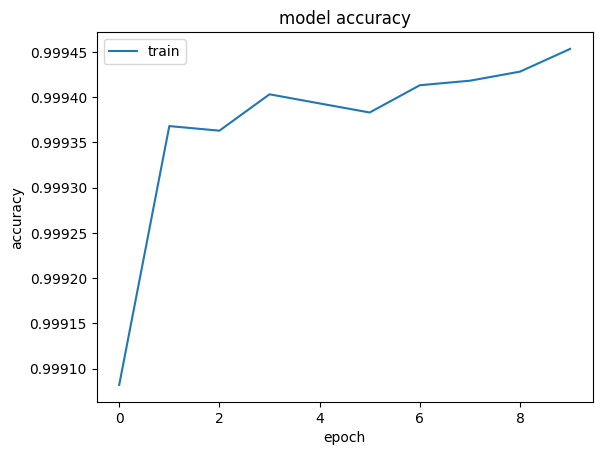

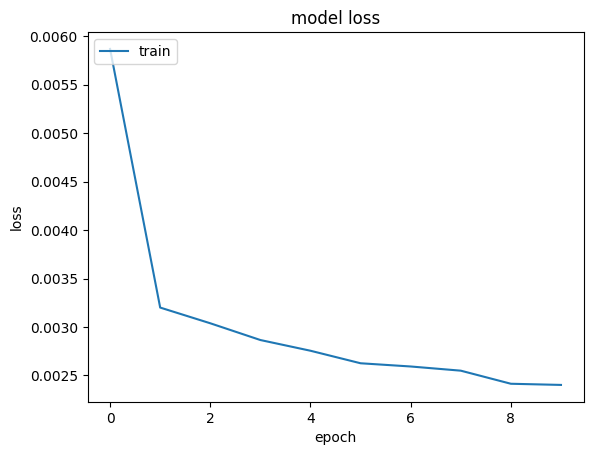

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

4.3 Evaluate model

In [ ]:
score = model.evaluate(X_test, y_test)
print(score)

2671/2671 [==============================] - 4s 1ms/step - loss: 0.0040 - accuracy: 0.9994
[0.003961132373660803, 0.9993796944618225]


In [ ]:
y_pred = model.predict(X_test)

2671/2671 [==============================] - 4s 1ms/step


[[85278    18]
 [   35   112]]


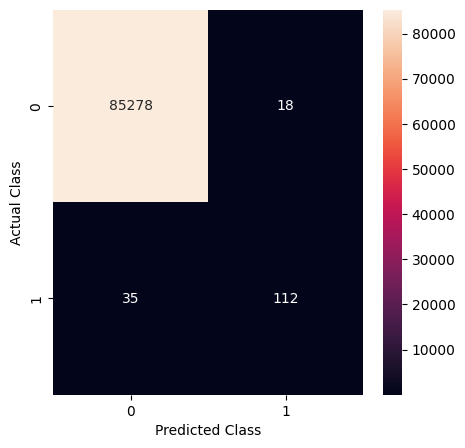

In [ ]:
cm = confusion_matrix(y_test, y_pred.round())
print(cm)
plot_confusion_matrix(cm)

In [ ]:
print_scores(y_test,y_pred.round())
a5 = accuracy_score(y_test,y_pred.round())

Accuracy :  0.9993797034280163
Precision :  0.8615384615384616
Recall :  0.7619047619047619
F1 Score :  0.8086642599277978


* Accuracy plot of different models used

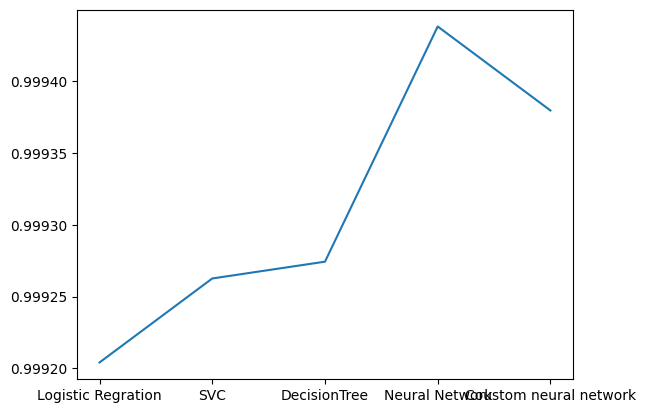

In [ ]:
accuracy = [a1,a2,a3,a4,a5]
models = ['Logistic Regration','SVC','DecisionTree','Neural Network','Coustom neural network']
plt.plot(models,accuracy)

# Undersampling & model test

Sampling is performed before data spliting which should be the case if future data is unbalanced, otherwise, sampling needs to be performed only on train set

In [ ]:
class1_indexes = np.array(data[data.Class == 1].index)
class0_indexes = np.array(data[data.Class == 0].index)
print(len(class0_indexes))
print(len(class1_indexes))

284315
492


In [ ]:
class0_indexes = data[data.Class == 0].index
#Randomly selecting
final_class0_indexes = np.random.choice(class0_indexes, len(class1_indexes), replace = False)
final_class0_indexes = np.array(final_class0_indexes)

In [ ]:
under_sample_ind = np.concatenate([class1_indexes, final_class0_indexes])

In [ ]:
print(len(under_sample_ind))

984


In [ ]:
under_sample_data = data.iloc[under_sample_ind, :]

In [ ]:
X_undersample = under_sample_data.iloc[:, :]
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']
X_undersample = X_undersample.drop(['Class','Time'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size = 0.3, random_state=0)

In [ ]:

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                720       
                                                                 
 dense_1 (Dense)             (None, 16)                400       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1265 (4.94 KB)
Trainable params: 1265 (4.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history2 = model.fit(X_train, y_train, batch_size = 16, epochs = 10)

Epoch 1/10
43/43 [==============================] - 2s 5ms/step - loss: 0.4745 - accuracy: 0.8997
Epoch 2/10
43/43 [==============================] - 0s 3ms/step - loss: 0.2520 - accuracy: 0.9419
Epoch 3/10
43/43 [==============================] - 0s 3ms/step - loss: 0.1874 - accuracy: 0.9520
Epoch 4/10
43/43 [==============================] - 0s 3ms/step - loss: 0.1671 - accuracy: 0.9549
Epoch 5/10
43/43 [==============================] - 0s 3ms/step - loss: 0.1624 - accuracy: 0.9622
Epoch 6/10
43/43 [==============================] - 0s 3ms/step - loss: 0.1574 - accuracy: 0.9622
Epoch 7/10
43/43 [==============================] - 0s 3ms/step - loss: 0.1522 - accuracy: 0.9608
Epoch 8/10
43/43 [==============================] - 0s 4ms/step - loss: 0.1472 - accuracy: 0.9680
Epoch 9/10
43/43 [==============================] - 0s 3ms/step - loss: 0.1410 - accuracy: 0.9666
Epoch 10/10
43/43 [==============================] - 0s 3ms/step - loss: 0.1167 - accuracy: 0.9709


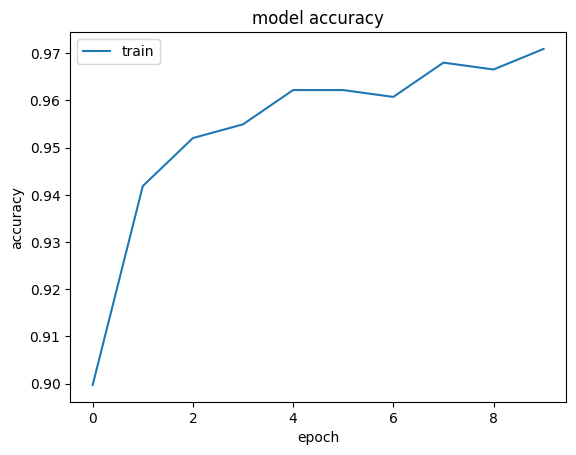

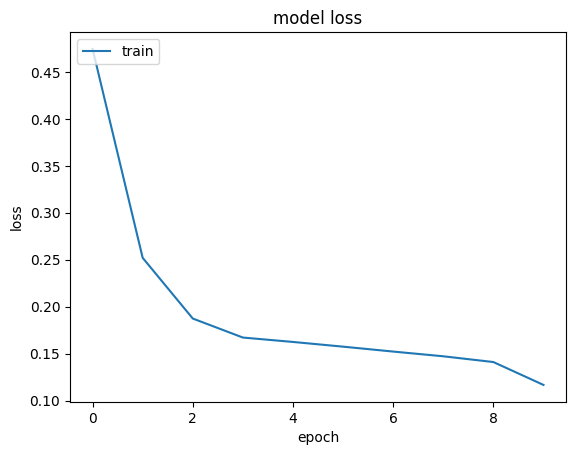

In [ ]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

10/10 [==============================] - 0s 2ms/step


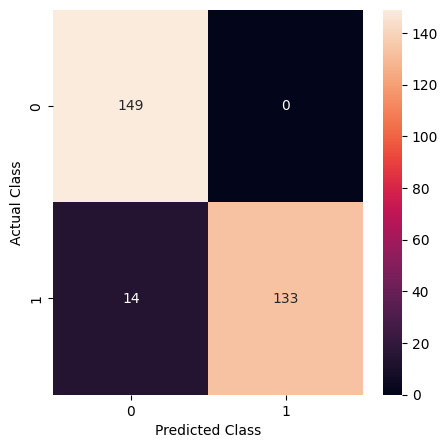

In [ ]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred.round())
plot_confusion_matrix(cm)
plt.show()

In [ ]:
print_scores(y_test,y_pred.round())

Accuracy :  0.9527027027027027
Precision :  1.0
Recall :  0.9047619047619048
F1 Score :  0.9500000000000001


# SMOTE & Model test

oversampling is performed before data spliting which should be the case if future data is unbalanced

In [ ]:
X_created, y_created = SMOTE().fit_resample(X, y)

In [ ]:
counter = Counter(y_created)
print(counter)

Counter({0: 284315, 1: 284315})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_created, y_created, test_size = 0.3,random_state=0)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history3 = model.fit(X_train, y_train, batch_size = 16, epochs = 10)

Epoch 1/10
24878/24878 [==============================] - 52s 2ms/step - loss: 0.0189 - accuracy: 0.9938
Epoch 2/10
24878/24878 [==============================] - 53s 2ms/step - loss: 0.0070 - accuracy: 0.9983
Epoch 3/10
24878/24878 [==============================] - 54s 2ms/step - loss: 0.0057 - accuracy: 0.9986
Epoch 4/10
24878/24878 [==============================] - 50s 2ms/step - loss: 0.0046 - accuracy: 0.9989
Epoch 5/10
24878/24878 [==============================] - 51s 2ms/step - loss: 0.0043 - accuracy: 0.9989
Epoch 6/10
24878/24878 [==============================] - 51s 2ms/step - loss: 0.0039 - accuracy: 0.9991
Epoch 7/10
24878/24878 [==============================] - 51s 2ms/step - loss: 0.0037 - accuracy: 0.9991
Epoch 8/10
24878/24878 [==============================] - 49s 2ms/step - loss: 0.0035 - accuracy: 0.9992
Epoch 9/10
24878/24878 [==============================] - 55s 2ms/step - loss: 0.0033 - accuracy: 0.9992
Epoch 10/10
24878/24878 [==============================

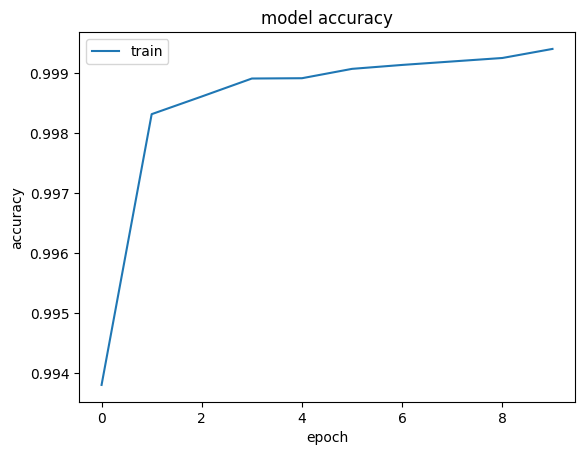

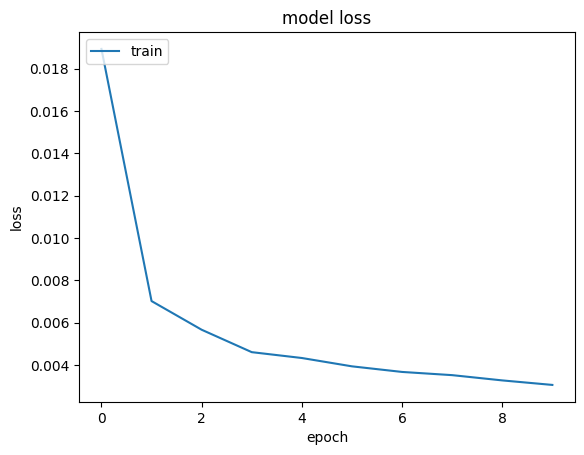

In [ ]:
# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test)

5331/5331 [==============================] - 7s 1ms/step


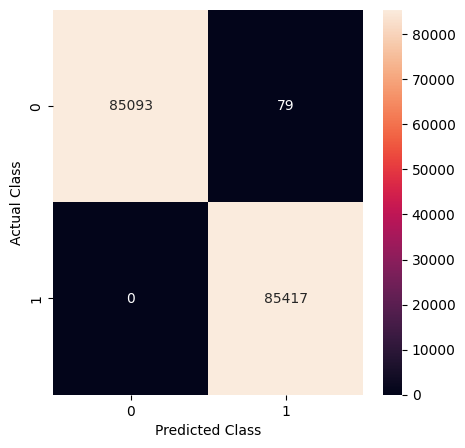

In [ ]:
cm = confusion_matrix(y_test, y_pred.round())
plot_confusion_matrix(cm)
plt.show()

In [ ]:
print_scores(y_test,y_pred.round())

Accuracy :  0.9995368986276958
Precision :  0.9990759801628146
Recall :  1.0
F1 Score :  0.9995377765295794
